# **Mall Customer Clustering**

## 1. Data Loading

In [10]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
# Load dataset from GitHub url
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)

In [12]:
# Rename columns for easier writing
df.rename(columns= {
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Score'
}, inplace=True)

df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


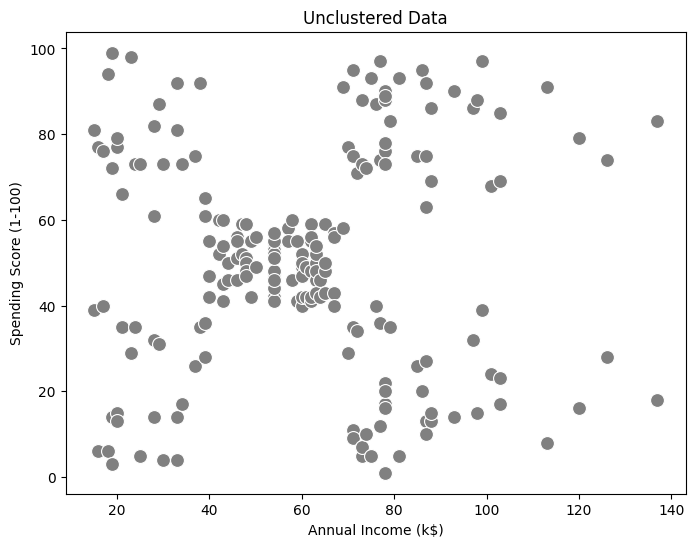

In [13]:
# Initial visualization
# We only use income and score, since that's what we're looking for.
X = df.iloc[:, [3,4]].values

# Visualize the raw data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:,0], y=X[:,1], s=100, color='grey')
plt.title('Unclustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## 2. Cluster Tuning

The algorithm that is used is K-Means Clustering. To find the ideal amount of clusters, the Elbow method will be used.

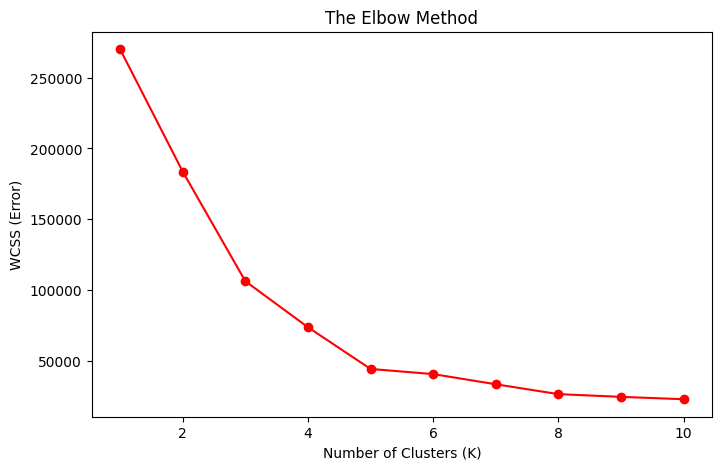

In [14]:
# Elbow method
wcss = [] # Within-Cluster Sum of Squares

# Check for K between 1-10
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Error)')
plt.show()

## 3. Training

The ideal amount of clusters from the Elbow method is 5.

In [15]:
# Train the model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

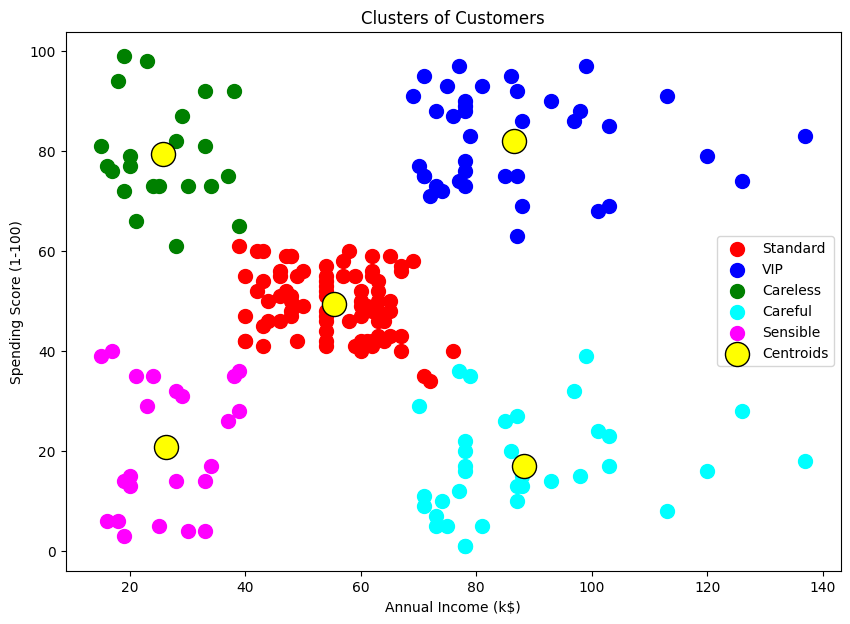

In [16]:
# Cluster visualization
plt.figure(figsize=(10,7))

# Plot each cluster (k=5)
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c='red', label='Standard') # Medium spending, low-medium income
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c='blue', label='VIP') # High spending, high income
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c='green', label='Careless') # High spending, low income
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=100, c='cyan', label='Careful') # Low spending, high income
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=100, c='magenta', label='Sensible') # Low spending, low income

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolor='black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()